In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# messed up the data transfer from GPT return, so have to clean
def extract_prediction(sentence):
    return sentence.replace("ChatCompletionMessage(content='", "").replace("', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)", "")

extract_prediction("ChatCompletionMessage(content='Neutral', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)")

'Neutral'

In [6]:
gpt4_data = pd.read_csv("responses/gpt-4.csv")
gpt4o_data = pd.read_csv("responses/gpt-4o.csv")
gpt4omini_data = pd.read_csv("responses/gpt-4o-mini.csv")

gpt4_data.classification = gpt4_data.classification.apply(extract_prediction)
gpt4o_data.classification = gpt4o_data.classification.apply(extract_prediction)
gpt4omini_data.classification = gpt4omini_data.classification.apply(extract_prediction)

gpt4_data.iloc[0]

Unnamed: 0                                                        7
sentence          Still , as backlash reactions like the attack ...
label                                                       Liberal
classification                                              Liberal
Name: 0, dtype: object

In [8]:
gpt4_data_libcon = pd.read_csv("responses/gpt-4-lib-con.csv")
gpt4o_data_libcon = pd.read_csv("responses/gpt-4o-lib-con.csv")
gpt4omini_data_libcon = pd.read_csv("responses/gpt-4o-mini-lib-con.csv")

gpt4_data_libcon.classification = gpt4_data_libcon.classification.apply(extract_prediction)
gpt4o_data_libcon.classification = gpt4o_data_libcon.classification.apply(extract_prediction)
gpt4omini_data_libcon.classification = gpt4omini_data_libcon.classification.apply(extract_prediction)

In [9]:
liberal_preds = {"gpt-4": gpt4_data.classification.value_counts()["Liberal"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Liberal"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Liberal"]}

neutral_preds = {"gpt-4": gpt4_data.classification.value_counts()["Neutral"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Neutral"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Neutral"]}

conservative_preds = {"gpt-4": gpt4_data.classification.value_counts()["Conservative"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Conservative"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Conservative"]}

print(liberal_preds, neutral_preds, conservative_preds)

{'gpt-4': 40, 'gpt-4o': 36, 'gpt-4o-mini': 41} {'gpt-4': 76, 'gpt-4o': 77, 'gpt-4o-mini': 94} {'gpt-4': 34, 'gpt-4o': 37, 'gpt-4o-mini': 15}


In [10]:
liberal_preds_lc = {"gpt-4": gpt4_data_libcon.classification.value_counts()["Liberal"], 
                 "gpt-4o": gpt4o_data_libcon.classification.value_counts()["Liberal"], 
                 "gpt-4o-mini": gpt4omini_data_libcon.classification.value_counts()["Liberal"]}

conservative_preds_lc = {"gpt-4": gpt4_data_libcon.classification.value_counts()["Conservative"], 
                 "gpt-4o": gpt4o_data_libcon.classification.value_counts()["Conservative"], 
                 "gpt-4o-mini": gpt4omini_data_libcon.classification.value_counts()["Conservative"]}

print(liberal_preds_lc, conservative_preds_lc)

{'gpt-4': 78, 'gpt-4o': 75, 'gpt-4o-mini': 117} {'gpt-4': 47, 'gpt-4o': 73, 'gpt-4o-mini': 33}


In [11]:
gpt4o_data_libcon.classification.value_counts()

classification
Liberal                                                                                                                                                                                                                                                                                                                     75
Conservative                                                                                                                                                                                                                                                                                                                73
This sentence does not explicitly convey a political ideology. However, if forced to classify, it could be interpreted as highlighting issues related to crime and law enforcement, which are often emphasized in Conservative discourse. Therefore, Conservative.                                                           1
This sentence does not conta

In [16]:
def plot_models(liberal, conservative, title, neutral=None):

    keys = list(liberal.keys())
    val1 = list(liberal.values())
    if neutral is not None: val2 = list(neutral.values())
    val3 = list(conservative.values())

    # offset = 1 if neutral is None else 0
    x = np.arange(len(keys))

    width = 0.2

    plt.bar(x - width, val1, width, label="liberal", color="blue")
    if neutral is not None: plt.bar(x, val2, width, label="neutral", color="gray")
    plt.bar(x + width, val3, width, label="conservative", color="red")

    plt.xlabel("Model")
    plt.ylabel("Num. Predictions")
    plt.title(title)
    plt.xticks(x, keys)
    plt.legend()

    plt.show()

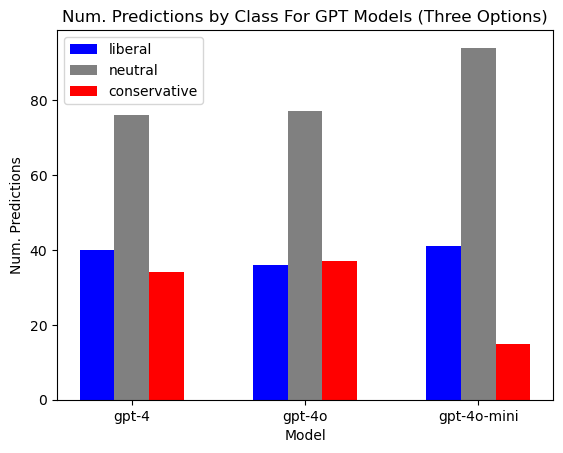

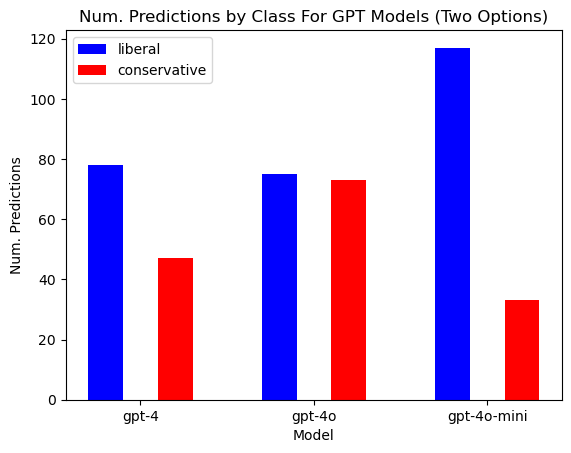

In [17]:
plot_models(liberal=liberal_preds, conservative=conservative_preds, neutral=neutral_preds, title="Num. Predictions by Class For GPT Models (Three Options)")
plot_models(liberal=liberal_preds_lc, conservative=conservative_preds_lc, title="Num. Predictions by Class For GPT Models (Two Options)")

In [15]:
gpt4_accuracy = len(gpt4_data[gpt4omini_data.label == gpt4_data.classification]) / len(gpt4_data)
gpt4o_accuracy = len(gpt4o_data[gpt4omini_data.label == gpt4o_data.classification]) / len(gpt4o_data)
gpt4omini_accuracy = len(gpt4omini_data[gpt4omini_data.label == gpt4omini_data.classification]) / len(gpt4omini_data)

print(gpt4_accuracy, gpt4o_accuracy, gpt4omini_accuracy)


0.7 0.6933333333333334 0.5466666666666666
